In [1]:
!pip install plotly --upgrade

In [53]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
x = [20,27,21, 37, 46, 53, 55, 47, 52, 32, 39, 41, 39,48, 48]
y = [1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]

In [4]:
grafico = px.scatter(x= x,y= y)
grafico.show()

In [5]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                [53,950],[55,2000],[47,2100],[52,3000],[32,5900],[39,4100],
                [41,5100],[39,7000],[48,5000],[48,6500]])

In [6]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [7]:
#Padronização dos dados
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [8]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [9]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [10]:
centroides = kmeans_salario.cluster_centers_
centroides

array([[-1.63312883, -0.77505093],
       [ 0.07703438,  1.11413572],
       [ 0.73953003, -0.72661025]])

In [11]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  22.66666667, 1700.        ],
       [  41.16666667, 5600.        ],
       [  48.33333333, 1800.        ]])

In [12]:
#verificar a quais grupos pertencem os registros
rotulos = kmeans_salario.labels_
rotulos

array([0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
grafico1 = px.scatter(x=base_salario[:,0], y=base_salario[:,1], color=rotulos)
grafico1.show()

In [14]:
grafico2 = px.scatter(x=centroides[:,0],y=centroides[:,1], size=[12,12,12])
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

## Base de dados - Crédito

In [15]:
base_cartão = pd.read_csv('/home/nunesfi/Desktop/IA/files/Bases de dados-20230823T013645Z-001/Bases de dados/credit_card_clients.csv', header= 1)
base_cartão

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [16]:
base_cartão['BILL_TOTAL'] = base_cartão['BILL_AMT1'] + base_cartão['BILL_AMT2'] + base_cartão['BILL_AMT3'] + base_cartão['BILL_AMT4'] + base_cartão['BILL_AMT5'] + base_cartão['BILL_AMT6']

In [17]:
base_cartão

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0         -1  ...          0          0         0       689         0   
1          0  ...       3455       3261         0      1000      1000   
2          0  ...      14948      15549      1518      1500      1000   
3          0  ...      28959      29547      2000      2019      1200   
4          0  ...      19146      19131      2000     36681     10000   
...      ...  ...        ...        ...       ...       ...       ...   
29995      0  ...      31237      15980      8500     20000      5003   
29996     -1  ...       5190          0      1837      3526      8998   
29997     -1  ...      20582      19357         0         0     22000   
29998      0  ...      11855      48944     85900      3409      1178   
29999      0  ...      32428      15313      2078      1800      1430   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  BILL_TOTAL  
0             0         0         0                           1        7704  
1          1000         0      2000                           1       17077  
2          1000      1000      5000                           0      101653  
3          1100      1069      1000                           0      231334  
4          9000       689       679                           0      109339  
...         ...       ...       ...                         ...         ...  
29995      3047      5000      1000                           0      725349  
29996       129         0         0                           0       21182  
29997      4200      2000      3100                           1       70496  
29998      1926     52964      1804                           1      266611  
29999      1000      1000      1000                           1      230874  

[30000 rows x 26 columns]

In [18]:
x_cartao = base_cartão.iloc[:, [1,25]].values
x_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [19]:
scaler_cartao = StandardScaler()
x_cartao = scaler_cartao.fit_transform(x_cartao)

In [20]:
x_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [21]:
#gerando clusters
wcss = []
for i in range(1, 11):
    kmeans_cartao = KMeans(n_clusters=i, random_state=0)
    kmeans_cartao.fit(x_cartao)
    wcss.append(kmeans_cartao.inertia_)

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/nunesfi/Desktop/IA/env_ia/lib/pyth

In [22]:
wcss

[59999.99999999978,
 35197.614579821835,
 20128.13107593308,
 14943.801288165927,
 10707.346740388302,
 8603.40240664865,
 7398.266087917011,
 6354.390259676857,
 5665.834420607433,
 5052.690789379008]

In [23]:
grafico = px.line(x= range(1,11), y=wcss)
grafico.show()

In [24]:
kmeans_cartao = KMeans(n_clusters=4, random_state=0)
rotulos = kmeans_cartao.fit_predict(x_cartao)

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
grafico = px.scatter(x=x_cartao[:,0], y=x_cartao[:,1], color=rotulos)
grafico.show()

In [26]:
lista_clientes = np.column_stack((base_cartão, rotulos))
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      2],
       [     2, 120000,      2, ...,      1,  17077,      2],
       [     3,  90000,      2, ...,      0, 101653,      2],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      2],
       [ 29999,  80000,      1, ...,      1, 266611,      2],
       [ 30000,  50000,      1, ...,      1, 230874,      2]])

In [27]:
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[  25677,  280000,       2, ...,       0,     271,       0],
       [  24956,  360000,       1, ...,       0,   12066,       0],
       [   8073,  300000,       2, ...,       0,  385113,       0],
       ...,
       [  28233,  340000,       2, ...,       0, 1767174,       3],
       [  28230,  400000,       2, ...,       1, 1041017,       3],
       [  21115,  480000,       1, ...,       0, 2393929,       3]])

In [28]:
x_cartao_mais = base_cartão.iloc[:,[1,2,3,4,5,25]]
x_cartao_mais

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  BILL_TOTAL
0          20000    2          2         1   24        7704
1         120000    2          2         2   26       17077
2          90000    2          2         2   34      101653
3          50000    2          2         1   37      231334
4          50000    1          2         1   57      109339
...          ...  ...        ...       ...  ...         ...
29995     220000    1          3         1   39      725349
29996     150000    1          3         2   43       21182
29997      30000    1          2         2   37       70496
29998      80000    1          3         1   41      266611
29999      50000    1          2         1   46      230874

[30000 rows x 6 columns]

In [29]:
scaler_cartao_mais = StandardScaler()
x_cartao_mais = scaler_cartao_mais.fit_transform(x_cartao_mais)
x_cartao_mais

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

In [30]:
wcss = []
for i in range(1, 11):
    kmeans_cartao_mais = KMeans(n_clusters=i, random_state=0)
    kmeans_cartao_mais.fit(x_cartao_mais)
    wcss.append(kmeans_cartao_mais.inertia_)

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/nunesfi/Desktop/IA/env_ia/lib/pyth

In [31]:
grafico = px.line(x= range(1,11), y=wcss)
grafico.show()

In [32]:
kmeans_cartao_mais = KMeans(n_clusters=2,random_state=0)
rotulos = kmeans_cartao_mais.fit_predict(x_cartao_mais)

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [33]:
rotulos

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

In [34]:
pca = PCA(n_components=2)
x_cartao_mais_pca = pca.fit_transform(x_cartao_mais)

In [35]:
x_cartao_mais_pca.shape

(30000, 2)

In [36]:
grafico = px.scatter(x=x_cartao_mais_pca[:,0], y=x_cartao_mais_pca[:,1], color=rotulos)
grafico.show()

## Agrupamento Hierarquico

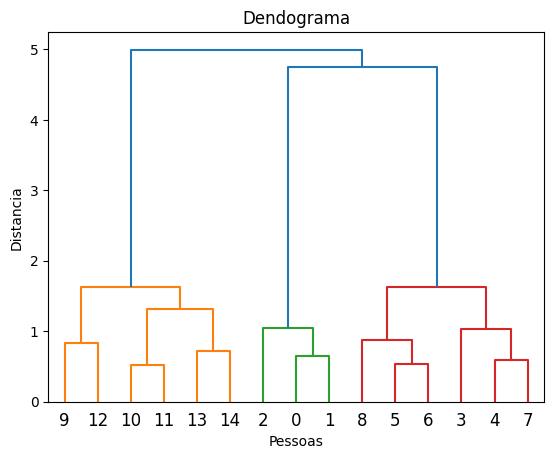

In [37]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendograma')
plt.xlabel('Pessoas')
plt.ylabel('Distancia');

In [38]:
hc_salrio = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
rotulos = hc_salrio.fit_predict(base_salario)

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [39]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [40]:
grafico = px.scatter(x=base_salario[:,0], y=base_salario[:,1], color=rotulos)
grafico.show()

## Algoritmo DBSCAN

In [41]:
dbscan_salario = DBSCAN(eps=0.95, min_samples=2)
dbscan_salario.fit(base_salario)

DBSCAN(eps=0.95, min_samples=2)

In [42]:
rotulos = dbscan_salario.labels_
rotulos

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [43]:
grafico = px.scatter(x=base_salario[:,0], y=base_salario[:,1], color=rotulos)
grafico.show()

# Base cartão de crédito

In [50]:
dbscan_cartao = DBSCAN(eps=0.37, min_samples=5)
rotulos = dbscan_cartao.fit_predict(x_cartao)

In [51]:
np.unique(rotulos, return_counts=True)

(array([-1,  0,  1,  2]), array([   52, 29920,    18,    10]))

In [52]:
grafico = px.scatter(x=x_cartao[:,0], y=x_cartao[:,1], color=rotulos)
grafico.show()

## Comparativos - K-means - Hierárquico - DBSCAN

In [62]:
#Gerando dados
x_random, y_random = datasets.make_moons(n_samples=1500, noise=0.09)

In [63]:
grafico = px.scatter(x=x_random[:,0], y= x_random[:,1])
grafico.show()

In [65]:
kmeans = KMeans(n_clusters=2)
rotulos = kmeans.fit_predict(x_random)
grafico = px.scatter(x =x_random[:,0], y=x_random[:,1], color=rotulos)
grafico.show()

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [66]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
rotulos = hc.fit(x_random)
grafico = px.scatter(x =x_random[:,0], y=x_random[:,1], color=rotulos)
grafico.show()

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'color' is of type str or int.

In [68]:
dbscan = DBSCAN(eps=0.1)
rotulos = dbscan.fit_predict(x_random)
grafico = px.scatter(x =x_random[:,0], y=x_random[:,1], color=rotulos)
grafico.show()